(0, 0.4540890406258284, 0.45294866668155565)
(1, 0.744208395562533, 0.7608805555110763)
(2, 0.07421966007249738, 0.08058780307396288)
(3, 0.29432460948534067, 0.3066839449130208)


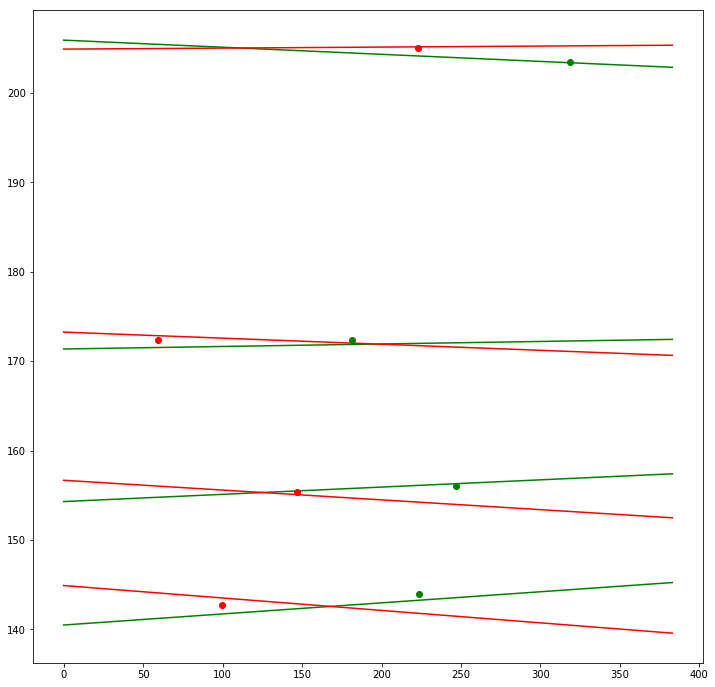

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
from scipy.misc import imread
#import pims
#import trackpy as tp
#from pims import Frame
import math
#The coordinate of matrix should be Top Left.
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
normal = np.max(TL)
MatrixL = np.array(TL)/normal
MatrixR = MatrixL.transpose()
PL = []
PR = []
LINEL = []
LINER = []
Pl0 = [181.544,384-211.678] # point in the left
Pr0 = [59.61,384-211.61] # point in the right
Pl1 = [223.43,384-240] 
Pr1 = [99.95,384-241.25] 
Pl2 = [318.36,384-180.55] 
Pr2 = [223.26,384-178.93] 
Pl3 = [247.01,384-228.00] 
Pr3 = [147.036,384-228.629]
Pl4 = [384-268.1624283,384-196.9579168]
Pr4 = [384-380.9819863,384-197.3868557]
Pl5 = [384-122.4970724,384-255.5938338]
Pr5 = [384-254.4025837,384-258.4559182]
Pl6 = [384-101.9839782,384-328.4487622]
Pr6 = [384-157.0699359,384-328.4861723]
Pl7 = [384-117.1437091,384-372.7670914]
Pr7 = [384-154.1756298,384-372.2922456]
Pl8 = [384-69.04573449,384-327.5660105]
Pr8 = [384-200.9878585,384-327.1738984]
Pl9 = [384-159.2819549,384-306.8727401]
Pr9 = [384-277.7101701,384-313.5317582]
PL.append(Pl0)
PL.append(Pl1)
PL.append(Pl2)
PL.append(Pl3)
PL.append(Pl4)
PL.append(Pl5)
PL.append(Pl6)
PL.append(Pl7)
PL.append(Pl8)
PL.append(Pl9)
PR.append(Pr0)
PR.append(Pr1)
PR.append(Pr2)
PR.append(Pr3)
PR.append(Pr4)
PR.append(Pr5)
PR.append(Pr6)
PR.append(Pr7)
PR.append(Pr8)
PR.append(Pr9)
imgL = imread('v0.png')
imgR = imread('u0.png')
plt.figure(figsize=(12,12))
#plt.imshow(imgL+imgR)
x = np.arange(0,384,1)
for ip in range(0,4):
    ipL = PL[ip]
    ipR = PR[ip]
    off = np.ones((1,1))
    ipL = np.append(ipL, off)
    ipR = np.append(ipR, off)
    LineL = np.dot(ipR,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixL) #points in the left frame and the corresponding epipolar lines in the right frame
    LINEL.append(LineL)
    LINER.append(LineR)
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]

    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='g')
    plt.plot(x,yR,color='r')
    plt.plot(PR[ip][0],PR[ip][1],"o",color='r')    
    plt.plot(PL[ip][0],PL[ip][1],"o",color='g')  
    print(ip,dlr,drl)
plt.show()

In [86]:
#Calculate the distance between the point ic and all other epipolar lines corresponding to the points in the other frame.
#The minimum should be the correct particle pair. 
off = np.ones((1,1))
for ip1 in range(len(PL)):
    ic = ip1
    DLR = []
    DRL = []
    MinInd = 0
    Min = 10000
    for ip in range(len(PL)):
        ipL0 = PL[ic]
        ipR0 = PR[ic]
        ipL0 = np.append(ipL0, off)
        ipR0 = np.append(ipR0, off)
        ipL = PL[ip]
        ipR = PR[ip]
        ipL = np.append(ipL, off)
        ipR = np.append(ipR, off)
        LineL = np.dot(ipR,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
        LineR = np.dot(ipL,MatrixL) #points in the left frame and the corresponding epipolar lines in the right frame
        yL = (-LineL[2]-LineL[0]*x)/LineL[1]
        yR = (-LineR[2]-LineR[0]*x)/LineR[1]
        dlr = math.fabs(np.dot(ipL0,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR0,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr+drl
        #print(ip1,ip,dlr,drl,FF)
        if(FF<Min):
            MinInd = ip
            Min = FF
        DLR.append(dlr)
        DRL.append(drl) 

In [75]:
#Compare point 6 and point 8; Since they are very close, itt is possible to have wrong particle pairing.
plt.figure()
plt.imshow(imgL)
yL6 = (-LINEL[6][2]-LINEL[6][0]*x)/LINEL[6][1]
yR6 = (-LINER[6][2]-LINER[6][0]*x)/LINER[6][1]
yL8 = (-LINEL[8][2]-LINEL[8][0]*x)/LINEL[8][1]
yR8 = (-LINER[8][2]-LINER[8][0]*x)/LINER[8][1]
plt.plot(PL[6][0],PL[6][1],"o",color='r')    
#plt.plot(PR[6][0],PR[6][1],"o",color='g')  
plt.plot(x,yL6,color='r')
#plt.plot(x,yR6,color='g')
plt.plot(PL[8][0],PL[8][1],"+",color='b')   
#plt.plot(PR[8][0],PR[8][1],"+",color='y')  
plt.plot(x,yL8,color='b')
#plt.plot(x,yR8,color='y')
plt.show()

IndexError: list index out of range